# Computational Methods in Ordinary Differential Equations

*Dr Jon Shiach, Department of Computing and Mathematics, Manchester Metropolitan University*

---
## Stability
The derivation of a numerical method to solve an ODE involves omitting the higher-order terms from the Taylor series known as **truncating** the [Taylor series](https://en.wikipedia.org/wiki/Taylor_series). In doing this we introduce an errors which at each step of the method and it is important to be able to analyse the extent to which these errors affect the numerical solutions. In the majority of cases the exact solution of an ODE is unknown (if it was known we would not need to use a numerical method to solve it) so we cannot determine the values of the errors but we can examine their behaviour through each step of the method.

To do this it is necessary to introduce terminology used to describe the [truncation errors](https://en.wikipedia.org/wiki/Truncation_error_(numerical_integration)).

> **Definition:** Let $y_n$ be a numerical approximation of the exact solution $\bar{y}_n$ for some step $n$ of a method then the **local truncation error** is 
<br><br>
$$\tau_n = |y_n - \bar{y}_n|,$$

> **Definition:** The **global truncation error** is the accumulation of the local truncation errors upto the current step
<br><br>
$$e_n = \sum_{i=0}^n \tau_i.$$

If $|\tau_{i+1} - \tau_{i}|>1$ (i.e., the local truncation errors grow from one step to the next) then $e_n \to \infty$ and the method is said to be **unstable** and unusable. So for a method to be considered **stable** we need the the growth in the local truncation errors to remain bounded which leads to the definition of numerical stability.

> **Definition**: If $\tau_n$ is the local truncation error of a numerical method for solving a differential equation then the method is considered **stable** if 
<br><br>
$$|\tau_{n+1} - \tau_{n}|\leq 1,$$
<br>
for all steps of the method.

#### Example
Consider the [Euler method](https://en.wikipedia.org/wiki/Euler_method) when applied to solve the ODE $y' = -2.3y$ over the domain $t \in [0, 5]$ with an intial condition $y(0) = 1$. This ODE has the exact solution $y=e^{-2.3t}$. The code below compares the Euler method solutions using two steps lengths of $h=0.7$ and $h=1$ to the exact solution.

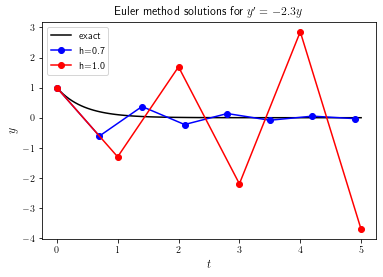

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

def euler(tspan, y0, h):
    """
    This function calculates the solution to the following IVP using the Euler method
    
            y'(t) = f(t, y(t)), tspan = [tmin, tmax], y(tmin) = y0
    """     
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0
    
    for n in range(nsteps):
        y[n+1] = y[n] + h * f(t[n], y[n])
        t[n+1] = t[n] + h
    
    return t, y


def f(t, y):
    return -2.3 * y


def exact_sol(t):
    return np.exp(-2.3 * t)


# Solve IVP using the Euler method 
t1, y1 = euler([0, 5], 1, 0.7) # h = 0.7
t2, y2 = euler([0, 5], 1, 1.0) # h = 1.0

# Calculate exact solution
texact = np.linspace(tspan[0], tspan[1], 100)
yexact = exact_sol(texact)

# Plot numerical and exact solutions
fig, ax = plt.subplots()

ax.plot(texact, yexact, 'k-', label='exact')
ax.plot(t1, y1, 'bo-', label='h=0.7')
ax.plot(t2, y2, 'ro-', label='h=1.0')
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
ax.set_title("Euler method solutions for $y'=-2.3y$", fontsize=12)
ax.legend()

plt.show()

Here we can see that the solution using $h=0.7$ remains stable whereas the solution using $h=1.0$ is diverging and unstable.

### Stability functions

To examine the behaviour of the local trunction errors as we step through a method we use the test ODE $y' = \lambda y$. As the values of $y_{n+1}$ are updated using the values of $y_n$ so are the values of $\tau_{n+1}$ using $\tau_n$ by the same method. This allows us to define a **stability function** for a method.

> **Definition:** The **stability function** of a method, $R(z)$ is the rate of growth over a single step of the method when applied to calculate the solution of an ODE of the form $y'=\lambda y$ where $z = h\lambda$ and $h$ is the step size, i.e.,
<br><br>
$$y_{n+1} = R(z)y_n.$$

#### Example
if the Euler method is used to solve and ODE of the form $y'=f(t, y)$ then the solution will be updated over one step using

$$y_{n+1} = y_n + hf(t_n, y_n),$$

then the local truncation errors will also update the same step by

$$\tau_{n+1} = \tau_n + hf(t_n, \tau_n).$$

Applying the Euler method to the test ODE this we have

$$y_{n+1} = y_n + h\lambda y_n.$$

Let $z = h\lambda$ then

\begin{align*}
    y_{n+1} &= y_n + zy_n \\
    &= (1 + z) y_n.
\end{align*}

So the stability function of the Euler method is $R(z) = 1 + z$.

### Absolute stability
We have seen that a necessary condition for stability of a method is that the local truncation errors must not grow from one step to the next. A method satisfying this basic condition is considered to be **absolutely stable**. Since the stability function $R(z)$ is expressed using $z=h\lambda$ then a method may be stable for some value of $z$ and unstable for others. This provides the definition for absolute stability. 

> **Definition:** A method is considered to be **absolutely stable** if $|R(z)\leq 1|$ for all $z\in \mathbb{C}$.

Of course we require our methods to be stable so it is useful to know for what values of $z$ we have a stable method. This gives the definition of the **region of absolute stability**.

> **Definition:** The **region of absolute stability** is the set of all $z\in \mathbb{C}$ for which a method is absolutely stable.
<br><br>
$$\text{region of absolute stability} = \{ z : z \in \mathbb{C}, |R(z)| \leq 1 \}.$$

#### Example
The stability function for the Euler method is $R(z) = 1 + z$. The code below generates a set of points in the complex plane $z = x + yi$ and plots the contour where $|R(z)|=1$ which represents the boundary of the stability region of the Euler method. 

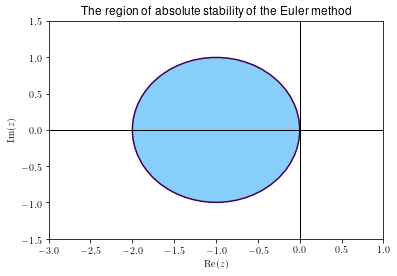

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

# Generate z values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
[X, Y] = np.meshgrid(x, y)
Z = X + Y * 1j

# Define the stability function for the Euler method
Rz = 1 + Z
 
# Plot the region of absolute stability
fig, ax = plt.subplots()

ax.contourf(X, Y, abs(Rz), levels=[0, 1], colors='lightskyblue')
ax.contour(X, Y, abs(Rz), levels=[1])
ax.plot([-10, 10], [0, 0], 'k', linewidth=1)
ax.plot([0, 0], [-10, 10], 'k', linewidth=1)

ax.set_title('The region of absolute stability of the Euler method')
ax.set_xlabel('$\mathrm{Re}(z)$')
ax.set_ylabel('$\mathrm{Im}(z)$')
ax.set_xlim(-3, 1)
ax.set_ylim(-1.5, 1.5)

plt.show()

The Euler method for solving $y'=\lambda y$ will be stable for point $z$ that lies within the shaded region.

### Interval of absolute stability
The choice of step length used in a method will depend on accuracy requirements, computational resources available and of course stability. It is often necessary to use as large a value of the step length as possible permitted by the stability requirements to minimise the computational effort required to solve an ODE. The range values of the step length that can be chosen is governed by the stability region and provides use with the following definition.

> **Definition:** The range of real values that the step length $h$ of a method can take that ensures a method remains absolutely stable is known as the **interval of absolute stability**

The region of absolute stability for the Euler method plotted above shows that the interval of absolute stability is

$$z \in [-2, 0],$$

i.e., the real part of the region of absolute stability.

Since $z=h\lambda$ then
\begin{align*}
    h \in \left[ -\frac{2}{\lambda}, 0\right]
\end{align*}
so we have the condition $h \leq -\dfrac{2}{\lambda}$.

#### Example
The step length for the Euler method when used to solve the ODE $y'=-2.3y$ must satisfy
$$h \leq \frac{2}{2.3} \approx 0.8696.$$

This is why in the first example the solution using $h=0.7$ was stable since $0.7 < 0.8696$ and the solution using $h=1.0$ was unstable since $1 > 0.8696$.

## Stability function of a Runge-Kutta Method

The general form of a Runge-Kutta method is

\begin{align*}
    y_{n+1} &= y_n + h\sum_{i=1}^s b_i k_i, \\
    k_i &= f\left(t_n + c_ih, y_n + h\sum_{j=1}^s a_{ij}k_j\right).
\end{align*}

Let $Y_i = y_n + h\displaystyle\sum_{j=1}^s a_{ij}k_j$ and applying the method to the test ODE $y'=\lambda y$ the method becomes

\begin{align*}
    y_{n+1} &= y_n + h\lambda \sum_{i=1}^s b_i Y_i, \\
    Y_i &= y_n + h\lambda \displaystyle\sum_{j=1}^s a_{ij} Y_j.
\end{align*}

Let $z=h\lambda$ and expanding out the summations in the stage values gives

\begin{align*}
    Y_1 &= y_n + z (a_{11}Y_1 + a_{21}Y_2 + \cdots + a_{1s}Y_s), \\
    Y_2 &= y_n + z (a_{21}Y_1 + a_{22}Y_2 + \cdots + a_{2s}Y_s), \\
    & \vdots \\
    Y_s &= y_n + z (a_{s1}Y_1 + a_{s2}Y_2 + \cdots + a_{ss}Y_s).
\end{align*}

Let $Y = (Y_1, Y_2, \ldots, Y_s)^T$ and $\mathbf{e} = (1, 1, \ldots, 1)^T$ then we can write the stage values in vector form as

\begin{align*}
    Y &= \mathbf{e} y_n + z A \cdot Y.
\end{align*}

Substituting $\displaystyle\sum_{i=1}^s b_iY_i = \mathbf{b}^T \cdot Y$ (the vector $\mathbf{b}$ is a column vector) into the expression for $y_{n+1}$ gives the vector form of a Runge-Kutta method to solve the test equation

\begin{align*}
    y_{n+1} &= y_n + z \mathbf{b}^T \cdot Y.
\end{align*}

### Stability function of explicit Runge-Kutta methods

Rerranging the vector equation for $Y$ seen above we have.

\begin{align*}
    Y &= (I - zA)^{-1} \cdot \mathbf{e} y_n
\end{align*}

Substituting into the vector form of the Runge-Kutta method gives

\begin{align*}
    y_{n+1} &= y_n + z\mathbf{b}^T \cdot (I - zA)^{-1} \cdot \mathbf{e} y_n\\
    &= (1 + z\mathbf{b}^T \cdot (I - zA)^{-1} \cdot \mathbf{e})y_n
\end{align*}

so the stability function is

$$R(z) = 1 + z\mathbf{b}^T \cdot (I - zA)^{-1} \cdot \mathbf{e}.$$ 

Using the geometric series of matrices $\sum_{k=0}^\infty (zA)^k = (I - zA)^{-1}$, the stabilty function can be written as the infinite series

\begin{align*}
    R(z) &= 1 + \sum_{k=0}^s \mathbf{b}^T \cdot A^k \cdot \mathbf{e} \, z^k
\end{align*}

Since the solution to the test ODE is $y=\exp(t)$, over one step of an Explicit Runge-Kutta (ERK) method we would expect the local truncation errors to change at a rate of $\exp(z)$, 

$$\exp(z) = \sum_{k=0}^\infty \frac{1}{k!}z^k = 1 + z + \frac{1}{2}z^2 + \frac{1}{6}z^3 + \frac{1}{24}z^4 + \cdots$$

Comparing the coefficients of $z^k$ in $R(z)$ and $e^z$ we have

$$\frac{1}{k!} = \mathbf{b}^T\cdot A^{k-1} \cdot \mathbf{e},$$

which must be satisfied up to the $k$th term in order for a $k$th-order ERK method to be stable.

#### Example
Determine the stability function for the following Runge-Kutta method and hences find its order.

$$\begin{array}{c|cccc}
    0 & 0 \cr
    \frac{1}{2} & \frac{1}{2} \cr
    \frac{3}{4} & \frac{3}{4} \cr
    1 & \frac{2}{9} & \frac{1}{3} & \frac{4}{9} \cr \hline
    & \frac{7}{24} & \frac{1}{4} & \frac{1}{3} & \frac{1}{8}
    \end{array}$$
    
The code below calculates the coefficients and outputs the stability function $R(z)$ for this ERK method.

In [10]:
import numpy as np
from sympy import Rational

# Define ERK method
A = np.array([[0, 0, 0, 0],
             [Rational('1/2'), 0, 0, 0],
             [0, Rational('3/4'), 0, 0],
             [Rational('2/9'), Rational('1/3'), Rational('4/9'), 0]])
b = np.array([Rational('7/24'), Rational('1/4'), Rational('1/3'), Rational('1/8')])
e = np.array([[1], [1], [1], [1]])
s = 4

# Determine stability function
print("R(z) = 1", end="")
for k in range(s):
    coeff = np.matmul(b, np.matmul(np.linalg.matrix_power(A, k), e))
    print(" + {}*z**{}".format(coeff, k+1), end="")

R(z) = 1 + [1]*z**1 + [1/2]*z**2 + [3/16]*z**3 + [1/48]*z**4

So the stability function is 

$$R(z) = 1 + z + \frac{1}{2}z^2 + \frac{3}{16}z^3 + \frac{1}{48}z^4$$

which agrees to the series expansion of $\exp(z)$ upto and including the $z^2$ term. Therefore this is a second-order ERK method.


#### Example
The code below calculates the stability functions of the first, second, third and fourth-order ERK methods and plots their regions of absolute stability.

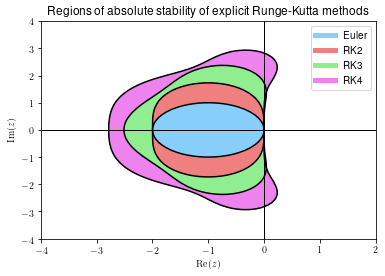

In [13]:
from math import factorial
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.lines import Line2D
rc('text', usetex=True)

# Generate z values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
[X, Y] = np.meshgrid(x, y)
Z = X + Y * 1j

# Define ERK stability functions
Rz = np.zeros((100, 100, 4)) * 1j
Rz[:,:,0] = 1 + Z

for i in range(1, 4):
    Rz[:,:,i] = Rz[:,:,i-1] + Z**(i+1) / factorial(i+1)

# Plot regions of absolute stability
fig, ax = plt.subplots()
fillcolours = ['lightskyblue', 'lightcoral', 'lightgreen', 'violet']

for i in range(3, -1, -1):
    ax.contourf(X, Y, abs(Rz[:,:,i]), levels=[0,1], colors=fillcolours[i])
    ax.contour(X, Y, abs(Rz[:,:,i]), levels=[1], colors='k')
    
ax.plot([-10, 10], [0, 0], 'k', linewidth=1)
ax.plot([0, 0], [-10, 10], 'k', linewidth=1)

ax.set_title('Regions of absolute stability of explicit Runge-Kutta methods')
ax.set_xlabel('$\mathrm{Re}(z)$')
ax.set_ylabel('$\mathrm{Im}(z)$')
ax.set_xlim(-4, 2)
ax.set_ylim(-4, 4)

labels = [Line2D([0], [0], color=fillcolours[0], linewidth=5),
          Line2D([0], [0], color=fillcolours[1], linewidth=5),
          Line2D([0], [0], color=fillcolours[2], linewidth=5),
          Line2D([0], [0], color=fillcolours[3], linewidth=5)]
ax.legend(labels, ['Euler', 'RK2', 'RK3', 'RK4'])

plt.show()


### Stability functions for an implicit method
The simplest implicit method for solving ODEs is the [Backwards Euler](https://en.wikipedia.org/wiki/Backward_Euler_method) method (also known as the implicit Euler method) which is

$$y_{n+1} = y_n + h(t_n + h, y_{n+1}).$$

Applying this to solve the test ODE $y'=\lambda y$ and rerranging gives

\begin{align*}
    y_{n+1} &= y_n + h\lambda y_{n+1} \\
    (1 - h\lambda)y_{n+1} &= y_n \\
    y_{n+1} &= \frac{1}{1-h\lambda} y_n,
\end{align*}

therefore the stability function for the backwards Euler method is $R(z)=\dfrac{1}{1-z}$. Stability functions for implicit methods take the form of a rational fraction

$$R(z) = \dfrac{P(z)}{Q(z)}.$$

#### Example
The code below plots the region of absolute stability of the backwards Euler method.

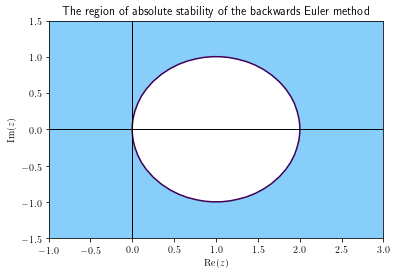

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.lines import Line2D
rc('text', usetex=True)

# Generate z values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
[X, Y] = np.meshgrid(x, y)
Z = X + Y * 1j

# Define stability function for the backwards Euler method
Rz = 1 / (1 - Z)

# Plot the region of absolute stability
fig, ax = plt.subplots()

ax.contourf(X, Y, abs(Rz), levels=[0, 1], colors='lightskyblue')
ax.contour(X, Y, abs(Rz), levels=[1])
ax.plot([-10, 10], [0, 0], 'k', linewidth=1)
ax.plot([0, 0], [-10, 10], 'k', linewidth=1)

ax.set_title('The region of absolute stability of the backwards Euler method')
ax.set_xlabel('$\mathrm{Re}(z)$')
ax.set_ylabel('$\mathrm{Im}(z)$')
ax.set_xlim(-1, 3)
ax.set_ylim(-1.5, 1.5)

plt.show()

Here the region of absolute stability includes all of the complex plane with the exception of the unshared region shown here.

### Stability functions for implicit Runge-Kutta methods

To determine the stability function for an Implicit Runge-Kutta (IRK) method we rerrange the matrix form of the method the test ODE $y'=\lambda y$

\begin{align*}
    y_{n+1} &= y_n + z \mathbf{b}^T \cdot Y, \\
    Y &= \mathbf{e} y_n + z A \cdot Y.
\end{align*}

Transposing these equations so that the terms not involving $y_n$ to the left-hand side gives

\begin{align*}
    y_{n+1} - z \mathbf{b}^T \cdot Y &= y_n, \\
    (I - zA) \cdot Y & = \mathbf{e}y_n.
\end{align*}

which can be written as the matrix equation

$$
\pmatrix{ 1 & -zb_1 & -zb_2 & \cdots & -zb_s \\
    0 & 1 - za_{11} & -za_{12} & \cdots & -za_{1s} \\
    0 & -za_{21} & 1 - za_{22} & \cdots & -za_{2s} \\
    0 & \vdots & \vdots & \ddots & \vdots  \\
    0 & -za_{s1} & -za_{s2} & \cdots & -za_{ss}
    }
\pmatrix{ y_{n+1} \\ Y_1 \\ Y_2 \\ \vdots \\ Y_s } = 
\pmatrix{ y_n \\ y_n \\ \vdots \\ y_n \\ y_n}
$$

Using [Cramer's rule](https://en.wikipedia.org/wiki/Cramer%27s_rule) to solve this system for $y_{n+1}$ we have

\begin{align*}
y_{n+1} &= \frac{\det
\pmatrix{ y_n & -zb_1 & -zb_2 & \cdots & -zb_s \\
    y_n & 1 - za_{11} & -za_{12} & \cdots & -za_{1s} \\
    y_n & -za_{21} & 1 - za_{22} & \cdots & -za_{2s} \\
    y_n & \vdots & \vdots & \ddots & \vdots  \\
    y_m & -za_{s1} & -za_{s2} & \cdots & -za_{ss}
    }}{\det(I - zA)}.
\end{align*}

Performing a row operation of subtracting the first row of matrix in the numerator from the other rows gives

\begin{align*}
y_{n+1} &= \frac{\det
\pmatrix{ y_n & -zb_1 & -zb_2 & \cdots & -zb_s \\
    0 & 1 - za_{11} + zb_1 & -za_{12} + zb_2 & \cdots & -za_{1s} + zb_s \\
    0 & -za_{21} + zb_1 & 1 - za_{22} + zb_2 & \cdots & -za_{2s} + zb_s \\
    0 & \vdots & \vdots & \ddots & \vdots  \\
    0 & -za_{s1} + zb_1 & -za_{s2} + zb_2 & \cdots & -za_{ss} + zb_s
    }}{\det(I - zA)} \\
    &= \frac{\det(I - z(A - \mathbf{e}\cdot \mathbf{b}^T)}{\det(I - zA)}y_n,
\end{align*}

where $\mathbf{e}\cdot \mathbf{b}^T$ is a diagonal matrix with the elements of $\mathbf{b}$ on the main diagonal. Therefore the stability function of an Implicit Runge-Kutta (IRK) method can be written as

$$R(z) = \frac{\det(I - z(A - \mathbf{e}\cdot \mathbf{b}^T))}{\det(I - zA)}.$$

### A-stability
As we saw in the plot of the region of absolute stability of the backwards Euler method, implicit methods have a much greater region than explicit methods and are very useful for solving stiff ODEs where the stabilty constraints placed on an explcit method means the step length $h$ is too small to be of practical use. A desirable property of some implicit methods is that there is no limit placed on the value of $h$ for which will result in an unstable method, this is known as **A-stability**.

> **Definition:** A method is said to be **A-stable** if its region of absolute stabilty satisfies
<br><br>
$$\{ z : z \in \mathbb{C}^-, |R(z)| \leq 1\}$$
<br>
i.e., the method is stable for all points in the left-hand side of the complex plane.

> **Theorem.** Given an implicit Runge-Kutta method with a stability function of the form
<br><br>
$$R(z) = \frac{P(z)}{Q(z)},$$
<br>
and define a polynomial function 
<br>
$$E(y) = Q(iy)Q(-iy) - P(iy)P(-iy),$$
then the method is A-stable if and only if the following are satisfied
<br>
1. All roots of $Q(z)$ have positive real parts;
2. $E(y)\geq 0$ for all $y\in \mathbb{R}$.


#### Example
Determine the stability function of the following IRK and determine whether it is A-stable or not.

$$\begin{array}{c|cc} 
    \frac{1}{2} - \frac{\sqrt{3}}{6} & \frac{1}{4} & \frac{1}{4} - \frac{\sqrt{3}}{6} \\
    \frac{1}{2} + \frac{\sqrt{3}}{6} & \frac{1}{4} + \frac{\sqrt{3}}{6} & \frac{1}{4} \\ \hline
    & \frac{1}{2} & \frac{1}{2}
\end{array}$$

In [14]:
from sympy import *

# Define IRK method
A = Matrix([[ Rational('1/4'), Rational('1/4') - sqrt(3) * Rational('1/6') ],
           [ Rational('1/4') + sqrt(3) * Rational('1/6'), Rational('1/4') ]])
b = Matrix([[ Rational('1/2'), 0 ],
            [ 0, Rational('1/2') ]])
I = eye(2)

# Calculate P(z) and Q(z) polynomials
z = symbols('z')
P = expand(det(I - z * (A - b )))
Q = expand(det(I - z * A))

# Find roots of Q(z)
roots = solve(Q)

# Calculate E(y)
y = symbols('y')
Pp = expand(det(I + 1j * y * (A - b)))
Pm = expand(det(I - 1j * y * (A - b)))
Qp = expand(det(I - 1j * y * A))
Qm = expand(det(I + 1j * y * A))
E = expand(Qp * Qm - Pp * Pm)

# Output polynomials
print("P(z) = {}".format(P))
print("Q(z) = {}".format(Q))
print("Q(z) has roots at {} and {}".format(roots[0], roots[1]))
print("E(y) = {}".format(E))

P(z) = z**2/12 + z/2 + 1
Q(z) = z**2/12 - z/2 + 1
Q(z) has roots at 3 - sqrt(3)*I and 3 + sqrt(3)*I
E(y) = 0


So the stability function for this IRK method is $R(z) = \dfrac{1 + \frac{1}{2}z + \frac{1}{12}z^2}{1 - \frac{1}{2}z + \frac{1}{12}z^2}$. Since the real parts of both roots of $Q(z)$ is $3$ which is positive and $E(y)=0$ we can say that this is an A-stable method.